In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示汉字
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

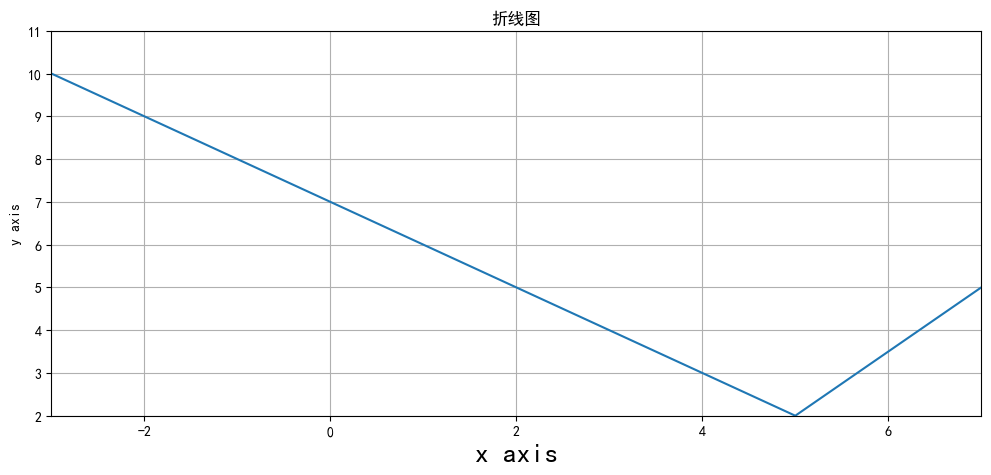

In [13]:
# 准备数据
x = [-3,5,7]  # 所有坐标点的 x坐标
y = [10,2,5]  # 所有坐标点的 y坐标

# 创建绘图区域
plt.figure(figsize=(12,5))
# 画图
plt.plot(x,y)
plt.grid(True)  # 添加网格线
plt.xlim(-3,7)
plt.ylim(2,11)
plt.xlabel('x axis',size=20)
plt.ylabel('y axis',size=10)
plt.title('折线图')
plt.show()

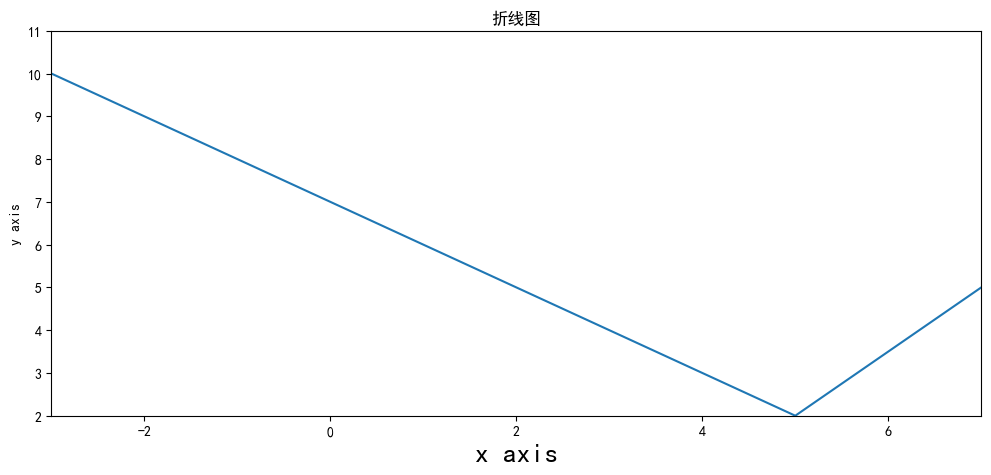

In [15]:
fig,ax = plt.subplots(figsize=(12,5)) # ax 坐标系
# 在坐标系中 画图
ax.plot(x,y)
ax.set_xlim(-3,7)
ax.set_ylim(2,11)
ax.set_xlabel('x axis',size=20)
ax.set_ylabel('y axis',size=10)
ax.set_title('折线图')
plt.show()

## 通过 anscombe数据说明数据可视化的重要性

In [17]:
import pandas as pd
anscombe = pd.read_csv('data/anscombe.csv')

In [19]:
anscombe.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

In [21]:
anscombe.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

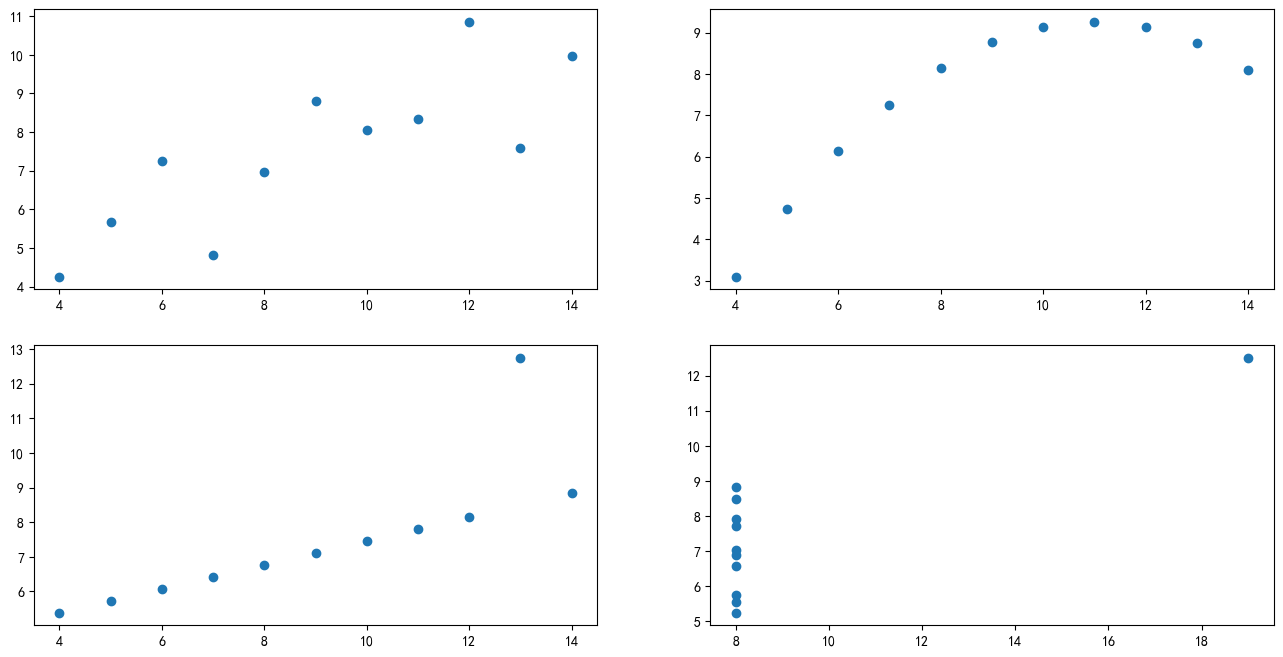

In [30]:
# 上面的数据一共可以分成4分 I II III IV  我们把这四份数据分别可视化, 画4张小图, 放到一个画布中
fig = plt.figure(figsize=(16,8))
# 在画布中 设置一个两行两列的框, 第一个框 对应axes1
axes1 = fig.add_subplot(2,2,1)
# 在画布中 设置一个两行两列的框, 第二个框 对应axes2
axes2 = fig.add_subplot(2,2,2)
# 在画布中 设置一个两行两列的框, 第三个框 对应axes3
axes3 = fig.add_subplot(2,2,3)
# 在画布中 设置一个两行两列的框, 第四个框 对应axes4
axes4 = fig.add_subplot(2,2,4)
axes1.scatter(anscombe[anscombe['dataset']=='I']['x'],anscombe[anscombe['dataset']=='I']['y'])
axes2.scatter(anscombe[anscombe['dataset']=='II']['x'],anscombe[anscombe['dataset']=='II']['y'])
axes3.scatter(anscombe[anscombe['dataset']=='III']['x'],anscombe[anscombe['dataset']=='III']['y'])
axes4.scatter(anscombe[anscombe['dataset']=='IV']['x'],anscombe[anscombe['dataset']=='IV']['y'])
plt.show()

## matplotlib 单变量可视化

In [31]:
tips = pd.read_csv('data/tips.csv')

In [35]:
import numpy as np
np.linspace(3.07,50.81,11)

array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
       41.262, 46.036, 50.81 ])

Text(0, 0.5, '出现次数')

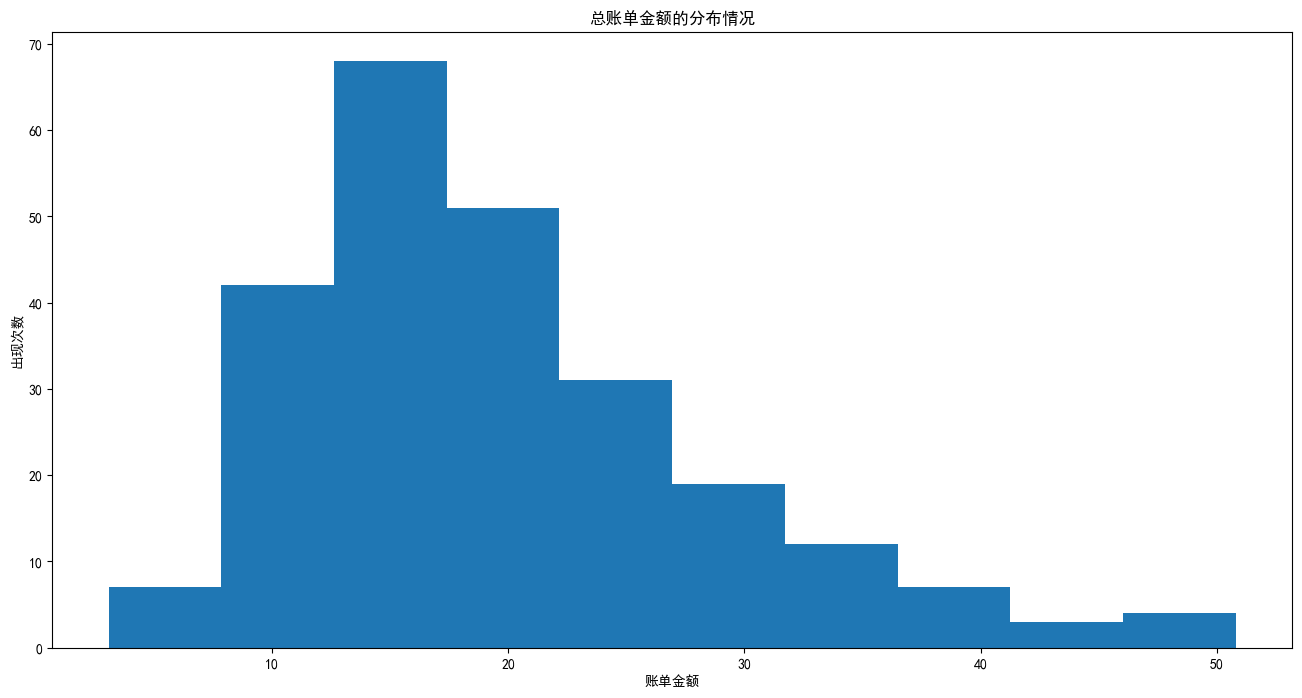

In [36]:
plt.figure(figsize=(16,8))
plt.hist(tips['total_bill'],bins=10)
plt.title('总账单金额的分布情况')
plt.xlabel('账单金额')
plt.ylabel('出现次数')

In [33]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

(array([29., 57., 34., 47., 24., 22., 18.,  3.,  3.,  4.,  1.,  0.,  0.,
         1.,  1.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
         7.6,  8.2,  8.8,  9.4, 10. ]),
 <BarContainer object of 15 artists>)

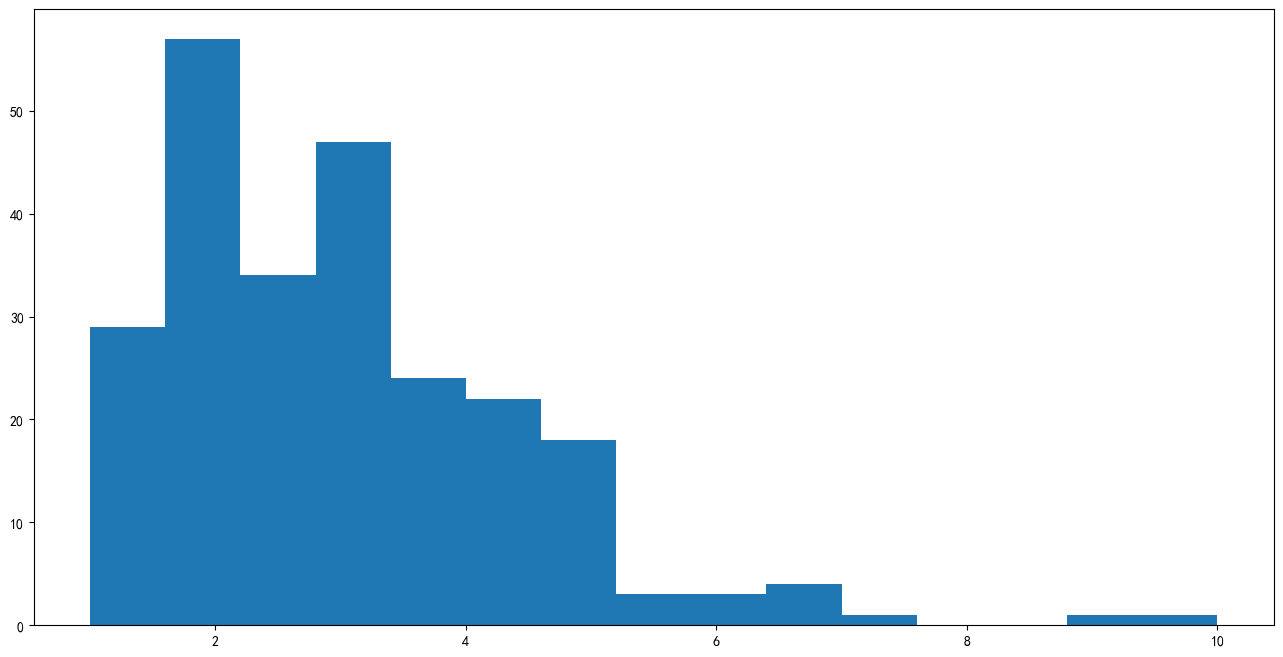

In [40]:
plt.figure(figsize=(16,8))
plt.hist(tips['tip'],bins=15)

## matplotlib 双变量可视化

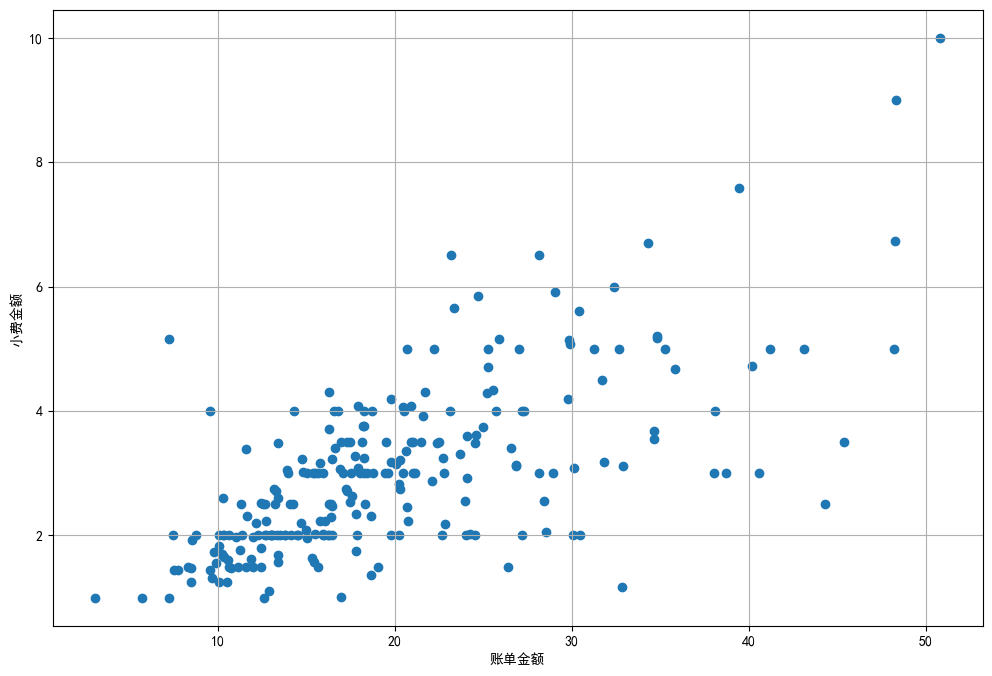

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(tips['total_bill'],tips['tip'])
plt.xlabel('账单金额')
plt.ylabel('小费金额')
plt.grid(True)

## Matplotlib多变量可视化

In [48]:
def recode_sex(sex):
    if sex=='Female':
        return 'r'
    else:
        return 'b'
tips['sex_color'] = tips['sex'].apply(recode_sex)

In [49]:
tips['sex_color'].value_counts()

b    157
r     87
Name: sex_color, dtype: int64

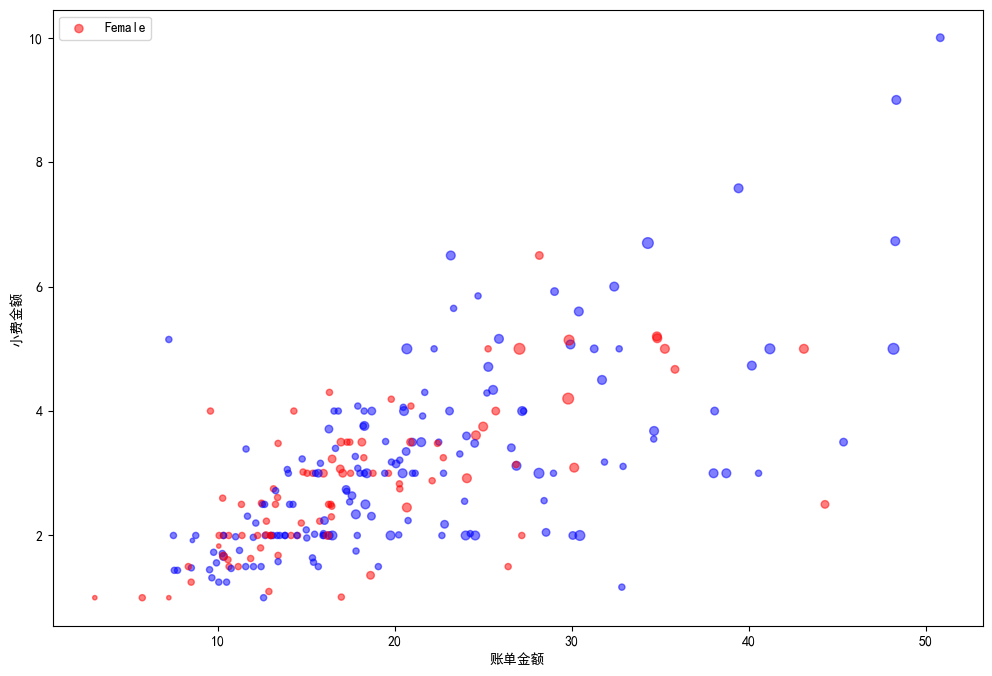

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(tips['total_bill'],tips['tip'],c=tips['sex_color'],s = tips['size']*10,alpha=0.5)
plt.xlabel('账单金额')
plt.ylabel('小费金额')
plt.legend(tips['sex'])